# Predicting Protein Classification - Matplotlib

**Import Pandas and Numpy**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. Import Datasets**

There are two data files. Both are arranged on "structureId" of the protein:

pdb_data_no_dups.csv contains protein meta data which includes details on protein classification, extraction methods, etc.

pdb_data_seq.csv contains >400,000 protein structure sequences.

In [2]:
df_seq = pd.read_csv(r'C:\Users\USER\Desktop\Exe_Python_2021\Exe_6-Pandas\pdb_data_seq.csv')
df_char = pd.read_csv(r'C:\Users\USER\Desktop\Exe_Python_2021\Exe_6-Pandas\pdb_data_no_dups.csv')

In [3]:
df_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [4]:
df_char.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


### Variable Description

*structureId:* identity of the structure

*classification:* classification type

*experimentalTechnique:* technique of experiment

*macromoleculeType:* type of macromolecule

*residueCount:* number of residue

*resolution:* amount of resolution

*structureMolecularWeight:* molecular weight

*crystallizationMethod:* method of crystallization

*crystallizationTempK:* crystallization temperature in Kelvin

*densityMatthews:* crystalline density

*densityPercentSol:* resolution ratio by density

*pdbxDetails:* detail about row

*phValue:* PH value

*publicationYear:* published year


**2. Filter and Process Data**

In [5]:
# Filter for only proteins
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']

In [6]:
protein_char.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [7]:
protein_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [8]:
protein_seq.describe().T

,count,mean,std,min,25%,50%,75%,max
residueCount,345180.0,4717.870508,26527.126728,3.0,398.0,856.0,1976.0,313236.0


In [9]:
protein_char.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

In [10]:
protein_char.describe().T

,count,mean,std,min,25%,50%,75%,max
residueCount,127798.0,721.049046,1741.791584,3.00,237.00,416.00,800.000,313236.00
resolution,117008.0,2.208678,1.339638,0.48,1.78,2.04,2.490,70.00
structureMolecularWeight,127798.0,89558.480262,469048.523022,453.55,26724.29,47060.00,91024.045,97730536.00
crystallizationTempK,88638.0,291.000731,8.764264,4.00,290.00,293.00,295.000,398.00
densityMatthews,114341.0,2.652620,0.687323,0.00,2.21,2.48,2.890,13.89
densityPercentSol,114362.0,51.113914,10.011235,0.00,44.16,50.20,57.320,92.00
phValue,95902.0,6.786939,1.307179,0.00,6.00,7.00,7.500,100.00
publicationYear,105931.0,2009.044746,8.521400,201.00,2005.00,2010.00,2014.000,2018.00


when we look this describe table phValue must be 0-14 but there is max value 100.

publicationYear has a value of 201, which is unlikely.

In [15]:
protein_char.loc[protein_char.publicationYear==201.0]=np.nan

In [16]:
protein_char.loc[protein_char.phValue>14]=np.nan

We will check that the dataframe has been updated:

In [18]:
protein_char.describe().T

,count,mean,std,min,25%,50%,75%,max
residueCount,127796.0,721.054274,1741.804493,3.00,237.00,416.00,800.00,313236.00
resolution,117007.0,2.208683,1.339642,0.48,1.78,2.04,2.49,70.00
structureMolecularWeight,127796.0,89559.201609,469052.147475,453.55,26726.39,47060.00,91024.90,97730536.00
crystallizationTempK,88637.0,291.000652,8.764282,4.00,290.00,293.00,295.00,398.00
densityMatthews,114340.0,2.652625,0.687324,0.00,2.21,2.48,2.89,13.89
densityPercentSol,114361.0,51.113993,10.011243,0.00,44.16,50.20,57.32,92.00
phValue,95901.0,6.785967,1.272059,0.00,6.00,7.00,7.50,12.00
publicationYear,105929.0,2009.061758,6.461747,1969.00,2005.00,2010.00,2014.00,2018.00


In [19]:
# Select  some variables to join
protein_char = protein_char[['structureId','classification','experimentalTechnique','residueCount', 'resolution',
       'structureMolecularWeight','crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue', 'publicationYear']]
protein_char.head()

,structureId,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154.0,2.07,18112.80,NaN,3.09,60.20,9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,165.0,1.74,18926.61,NaN,2.75,55.28,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154.0,1.84,18010.64,NaN,3.09,60.20,9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,167.0,1.90,19092.72,NaN,2.70,54.46,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154.0,2.07,18093.78,NaN,3.09,60.30,9.0,1999.0


In [20]:
protein_seq = protein_seq[['structureId','sequence']]
protein_seq.head()

,structureId,sequence
4,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


*We can now perform a join using structureId as the index. We'll utilize pandas 'join' method. To do this, we have to set the index for each dataframe to be 'structureId'.*

**Join columns of another DataFrame:**

**df.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)**

Join columns with other DataFrame either on index or on a key column. Efficiently join multiple DataFrame objects by index at once by passing a list.

One option of using the key columns is to use the on parameter. DataFrame.join always uses other’s index but we can use any column in df. This method preserves the original DataFrame’s index in the result.

In [21]:
# Join two datasets on structureId
model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f.head()

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence
structureId,,,,,,,,,,,
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154.0,2.07,18112.80,NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,165.0,1.74,18926.61,NaN,2.75,55.28,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154.0,1.84,18010.64,NaN,3.09,60.20,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,167.0,1.90,19092.72,NaN,2.70,54.46,NaN,1993.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,154.0,2.07,18093.78,NaN,3.09,60.30,9.0,1999.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [22]:
print('%d is the number of rows in the joined dataset' %model_f.shape[0])

346317 is the number of rows in the joined dataset


The two dataframes have officially been joined into one with 346,325 proteins. The data processing is not finished as it's important to take a look at the misingness associated with the columns.

In [24]:
# Check NA counts
count_null=model_f.isnull().sum()
count_null

classification                   3
experimentalTechnique            2
residueCount                     2
resolution                   16093
structureMolecularWeight         2
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
phValue                      87195
publicationYear              50964
sequence                         5
dtype: int64

In [27]:
type(count_null)

pandas.core.series.Series

With 346,325 proteins, it appears that simply removing missing values is acceptable.

In [138]:
#define DataFrame
df_null = pd.DataFrame({'columns':count_null.index, 'null_count':count_null.values}) 
df_null

,columns,null_count
0,classification,3
1,experimentalTechnique,2
2,residueCount,2
3,resolution,16093
4,structureMolecularWeight,2
5,crystallizationTempK,102391
6,densityMatthews,38844
7,densityPercentSol,38710
8,phValue,87195
9,publicationYear,50964


Text(0, 0.5, 'Number Of nulls')

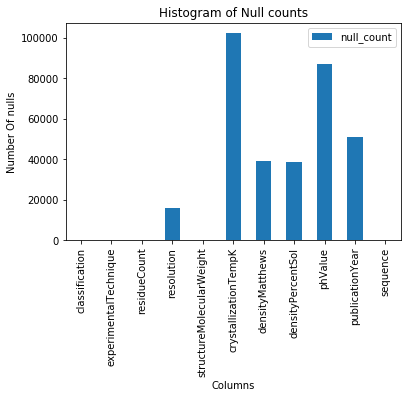

In [59]:
# df_null
ax = df_null.plot.bar(x=df_null.keys()[0], y=df_null.keys()[1], rot=90,title='Histogram of Null counts')
# df_null.keys()[0] = columns
# df_null.keys()[1] = null_count
plt.xlabel('Columns')
plt.ylabel("Number Of nulls")

**3. Drop rows with missing values**

In [53]:
model_f = model_f.dropna()
print('%d is the number of proteins that have a classification and sequence' %model_f.shape[0])

176001 is the number of proteins that have a classification and sequence


**4. Types of family groups:**

In [54]:
# Look at classification type counts
counts = model_f.classification.value_counts()
counts.head(10)

HYDROLASE                        23716
TRANSFERASE                      18709
OXIDOREDUCTASE                   17718
IMMUNE SYSTEM                    10031
HYDROLASE/HYDROLASE INHIBITOR     9166
LYASE                             6368
TRANSCRIPTION                     4759
TRANSPORT PROTEIN                 4190
VIRAL PROTEIN                     4120
ISOMERASE                         3253
Name: classification, dtype: int64

*Displays the end of the dataframe:*

In [55]:
counts.tail(10)

Isomerase, PROTEIN BINDING/INHIBITOR      1
VIRAL PROTEIN,RNA BINDING PROTEIN         1
TOXIN,LYASE                               1
ADENOSINE BINDING PROTEIN                 1
Fluorescent Protein, transcription        1
Replication/Chaperone                     1
hydrolase, hydrolase inhibitor            1
PROTEIN BINDING, METAL BINDING PROTEIN    1
cellulosome                               1
CELLULOSE DEGRADATION                     1
Name: classification, dtype: int64

In [68]:
df_counts = pd.DataFrame({'Family groups':counts.index, 'Amount':counts.values})
df_counts

,Family groups,Amount
0,HYDROLASE,23716
1,TRANSFERASE,18709
2,OXIDOREDUCTASE,17718
3,IMMUNE SYSTEM,10031
4,HYDROLASE/HYDROLASE INHIBITOR,9166
...,...,...
2237,Replication/Chaperone,1
2238,"hydrolase, hydrolase inhibitor",1
2239,"PROTEIN BINDING, METAL BINDING PROTEIN",1
2240,cellulosome,1


Text(0, 0.5, 'amount')

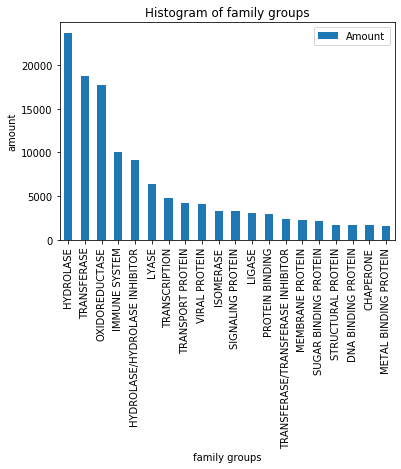

In [137]:
# df_null
ax = df_counts.iloc[0:20].plot.bar(x=df_counts.keys()[0], y=df_counts.keys()[1], rot=90,title='Histogram of family groups')
plt.xlabel('family groups')
plt.ylabel("amount")

**5. Calculating the amount of the different classification types in the datafame:**

There appears to be a wide distribution of counts for family types. We can do filter for having a certain amount of recordes that are of a specific family type:

In [70]:
# Get classification types where counts are over 1000
types = np.asarray(counts[(counts > 1000)].index)
print(len(types))

30


In [71]:
types 

array(['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM',
       'HYDROLASE/HYDROLASE INHIBITOR', 'LYASE', 'TRANSCRIPTION',
       'TRANSPORT PROTEIN', 'VIRAL PROTEIN', 'ISOMERASE',
       'SIGNALING PROTEIN', 'LIGASE', 'PROTEIN BINDING',
       'TRANSFERASE/TRANSFERASE INHIBITOR', 'MEMBRANE PROTEIN',
       'SUGAR BINDING PROTEIN', 'STRUCTURAL PROTEIN',
       'DNA BINDING PROTEIN', 'CHAPERONE', 'METAL BINDING PROTEIN',
       'CELL ADHESION', 'ELECTRON TRANSPORT', 'PROTEIN TRANSPORT',
       'UNKNOWN FUNCTION', 'TOXIN', 'PHOTOSYNTHESIS', 'CELL CYCLE',
       'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR', 'GENE REGULATION',
       'RNA BINDING PROTEIN'], dtype=object)

*Filter dataset's records and drop_duplicates*

In [72]:
# Filter dataset's records for classification types > 1000
filter_df = model_f[model_f.classification.isin(types)]
len(filter_df)

136631

In [73]:
filter_df

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence
structureId,,,,,,,,,,,
1A4S,OXIDOREDUCTASE,X-RAY DIFFRACTION,2012.0,2.10,217689.59,287.0,2.43,41.00,7.5,1998.0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...
1A4S,OXIDOREDUCTASE,X-RAY DIFFRACTION,2012.0,2.10,217689.59,287.0,2.43,41.00,7.5,1998.0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...
1A4S,OXIDOREDUCTASE,X-RAY DIFFRACTION,2012.0,2.10,217689.59,287.0,2.43,41.00,7.5,1998.0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...
1A4S,OXIDOREDUCTASE,X-RAY DIFFRACTION,2012.0,2.10,217689.59,287.0,2.43,41.00,7.5,1998.0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...
1A6Q,HYDROLASE,X-RAY DIFFRACTION,382.0,2.00,42707.55,277.0,2.97,59.00,5.0,1996.0,MGAFLDKPKMEKHNAQGQGNGLRYGLSSMQGWRVEMEDAHTAVIGL...
...,...,...,...,...,...,...,...,...,...,...,...
6F6P,HYDROLASE,X-RAY DIFFRACTION,424.0,2.45,47994.95,291.0,2.61,56.00,7.3,2018.0,GASSRLRSPSVLEVREKGYERLKEELAKAQRELKLKDEECERLSKV...
6F6P,HYDROLASE,X-RAY DIFFRACTION,424.0,2.45,47994.95,291.0,2.61,56.00,7.3,2018.0,GAASRLRSPSVLEVREKGYERLKEELAKAQRELKLKDEECERLSKV...
6F6S,VIRAL PROTEIN,X-RAY DIFFRACTION,497.0,2.29,58337.03,293.0,3.83,67.89,5.2,2018.0,ETGRSIPLGVIHNSALQVSDVDKLVCRDKLSSTNQLRSVGLNLEGN...


In [74]:
filter_df1 = filter_df.drop_duplicates(subset=["classification","sequence"])
filter_df1 

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence
structureId,,,,,,,,,,,
1A4S,OXIDOREDUCTASE,X-RAY DIFFRACTION,2012.0,2.10,217689.59,287.0,2.43,41.00,7.5,1998.0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...
1A6Q,HYDROLASE,X-RAY DIFFRACTION,382.0,2.00,42707.55,277.0,2.97,59.00,5.0,1996.0,MGAFLDKPKMEKHNAQGQGNGLRYGLSSMQGWRVEMEDAHTAVIGL...
1A72,OXIDOREDUCTASE,X-RAY DIFFRACTION,374.0,2.60,40658.50,277.0,2.30,46.82,8.4,1998.0,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...
1A8O,VIRAL PROTEIN,X-RAY DIFFRACTION,70.0,1.70,8175.72,277.0,2.21,43.80,8.0,1997.0,MDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANP...
1ACC,TOXIN,X-RAY DIFFRACTION,735.0,2.10,82849.97,277.0,2.30,47.00,6.0,1997.0,EVKQENRLLNESESSSQGLLGYYFSDLNFQAPMVVTSSTTGDLSIP...
...,...,...,...,...,...,...,...,...,...,...,...
6F5U,VIRAL PROTEIN,X-RAY DIFFRACTION,498.0,2.07,57299.72,293.0,3.48,64.67,5.2,2018.0,EAIVNAQPKCNPNLHYWTTQDEGAAIGLAWIPYFGPAAEGIYIEGL...
6F6P,HYDROLASE,X-RAY DIFFRACTION,424.0,2.45,47994.95,291.0,2.61,56.00,7.3,2018.0,GAASRLRSPSVLEVREKGYERLKEELAKAQRELKLKDEECERLSKV...
6F6P,HYDROLASE,X-RAY DIFFRACTION,424.0,2.45,47994.95,291.0,2.61,56.00,7.3,2018.0,GASSRLRSPSVLEVREKGYERLKEELAKAQRELKLKDEECERLSKV...


In [75]:
filter_df1.shape

(36146, 11)

In [76]:

print(types)
print('%d is the number of records in the final filtered dataset' %filter_df1.shape[0])

['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM'
 'HYDROLASE/HYDROLASE INHIBITOR' 'LYASE' 'TRANSCRIPTION'
 'TRANSPORT PROTEIN' 'VIRAL PROTEIN' 'ISOMERASE' 'SIGNALING PROTEIN'
 'LIGASE' 'PROTEIN BINDING' 'TRANSFERASE/TRANSFERASE INHIBITOR'
 'MEMBRANE PROTEIN' 'SUGAR BINDING PROTEIN' 'STRUCTURAL PROTEIN'
 'DNA BINDING PROTEIN' 'CHAPERONE' 'METAL BINDING PROTEIN' 'CELL ADHESION'
 'ELECTRON TRANSPORT' 'PROTEIN TRANSPORT' 'UNKNOWN FUNCTION' 'TOXIN'
 'PHOTOSYNTHESIS' 'CELL CYCLE' 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR'
 'GENE REGULATION' 'RNA BINDING PROTEIN']
36146 is the number of records in the final filtered dataset


## More exercises

In [77]:
df_exe=filter_df1.copy()

In [78]:
df_exe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36146 entries, 1A4S to 6F8P
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classification            36146 non-null  object 
 1   experimentalTechnique     36146 non-null  object 
 2   residueCount              36146 non-null  float64
 3   resolution                36146 non-null  float64
 4   structureMolecularWeight  36146 non-null  float64
 5   crystallizationTempK      36146 non-null  float64
 6   densityMatthews           36146 non-null  float64
 7   densityPercentSol         36146 non-null  float64
 8   phValue                   36146 non-null  float64
 9   publicationYear           36146 non-null  float64
 10  sequence                  36146 non-null  object 
dtypes: float64(8), object(3)
memory usage: 3.3+ MB


**6. Find the ten most recently published proteins**

In [79]:
df_exe.sort_values('publicationYear')

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence
structureId,,,,,,,,,,,
2OZ9,DNA BINDING PROTEIN,X-RAY DIFFRACTION,107.0,1.65,12562.21,298.0,1.93,36.30,5.0,1988.0,AQQSPYSAAMAEQRHQEWLRFVDLLKNAYQNDLHLPLLNLMLTPDE...
1FR1,HYDROLASE,X-RAY DIFFRACTION,722.0,2.00,79510.50,295.0,2.34,47.46,8.0,1990.0,AAKTEQQIADIVNRTITPLMQEQAIPGMAVAIIYQGKPYYFTWGKA...
1N8S,HYDROLASE,X-RAY DIFFRACTION,544.0,3.04,59919.29,293.0,3.90,68.44,6.0,1992.0,VPDPRGIIINLDEGELCLNSAQCKSNCCQHDTILSLLRCALKAREN...
1N8S,HYDROLASE,X-RAY DIFFRACTION,544.0,3.04,59919.29,293.0,3.90,68.44,6.0,1992.0,KEVCYERLGCFSDDSPWSGITERPLHILPWSPKDVNTRFLLYTNEN...
1N0J,OXIDOREDUCTASE,X-RAY DIFFRACTION,398.0,2.20,44838.49,293.0,2.31,46.81,7.5,1992.0,MKHSLPDLPYDYGALEPHINAQIMQLHHSKHHAAYVNNLNVTEEKY...
...,...,...,...,...,...,...,...,...,...,...,...
5NJU,VIRAL PROTEIN,X-RAY DIFFRACTION,520.0,2.10,58629.55,291.0,2.58,52.33,5.0,2018.0,GETLGEKWKARLNQMSALEFYSYKKSGITEVCREEARRALKDGVAT...
5NJD,IMMUNE SYSTEM,X-RAY DIFFRACTION,6360.0,3.90,701488.06,287.0,3.83,67.87,6.0,2018.0,MGILPSPGMPALLSLVSLLSVLLMGCVAQVQLVESGGGVVQPGRSL...
5NJD,IMMUNE SYSTEM,X-RAY DIFFRACTION,6360.0,3.90,701488.06,287.0,3.83,67.87,6.0,2018.0,MGILPSPGMPALLSLVSLLSVLLMGCVAQSVLTQPPSVSGAPGQRV...


In [80]:
df_exe.tail(10)

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence
structureId,,,,,,,,,,,
6F0I,MEMBRANE PROTEIN,X-RAY DIFFRACTION,1585.0,3.00,186384.34,291.15,5.19,76.31,4.0,2017.0,GQDMVSPPPPIADEPLTVNTGIYLIACYSLDDKAETFKVNAFLSLS...
6F1C,HYDROLASE,X-RAY DIFFRACTION,1136.0,4.20,133183.53,293.00,4.58,73.12,8.0,2018.0,SIPIPQKLFGEVTSPLFPKPYPNNFETTTVITVPTGYRVKLVFQQF...
6F1C,HYDROLASE,X-RAY DIFFRACTION,1136.0,4.20,133183.53,293.00,4.58,73.12,8.0,2018.0,EPTMYGEILSPNYPQAYPSEVEKSWDIEVPEGYGIHLYFTHLDIEL...
6F1D,HYDROLASE,X-RAY DIFFRACTION,117.0,1.95,13480.91,298.00,2.91,57.70,8.5,2018.0,AECSSELYTEASGYISSLEYPRSYPPDLRCNYSIRVERGLTLHLKF...
6F5U,VIRAL PROTEIN,X-RAY DIFFRACTION,498.0,2.07,57299.72,293.00,3.48,64.67,5.2,2018.0,ETGRSIPLGVIHNSALQVSDVDKLVCRDKLSSTNQLRSVGLNLEGN...
6F5U,VIRAL PROTEIN,X-RAY DIFFRACTION,498.0,2.07,57299.72,293.00,3.48,64.67,5.2,2018.0,EAIVNAQPKCNPNLHYWTTQDEGAAIGLAWIPYFGPAAEGIYIEGL...
6F6P,HYDROLASE,X-RAY DIFFRACTION,424.0,2.45,47994.95,291.00,2.61,56.00,7.3,2018.0,GAASRLRSPSVLEVREKGYERLKEELAKAQRELKLKDEECERLSKV...
6F6P,HYDROLASE,X-RAY DIFFRACTION,424.0,2.45,47994.95,291.00,2.61,56.00,7.3,2018.0,GASSRLRSPSVLEVREKGYERLKEELAKAQRELKLKDEECERLSKV...
6F6S,VIRAL PROTEIN,X-RAY DIFFRACTION,497.0,2.29,58337.03,293.00,3.83,67.89,5.2,2018.0,ETGRSIPLGVIHNSALQVSDVDKLVCRDKLSSTNQLRSVGLNLEGN...


**7. Write a program that finds the percentage distribution of PH values according to Acid-Base-Neutral Balance.**

**Acidic:**

**Base:**

**Neutral:**

In [93]:
def ph(ph):
    if ph < 7 :
        ph = 'Acidic'
    elif ph > 7:
        ph = 'Base'
    else:
        ph = 'Neutral'
    return ph

In [94]:
df_exe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36146 entries, 1A4S to 6F8P
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   classification            36146 non-null  object 
 1   experimentalTechnique     36146 non-null  object 
 2   residueCount              36146 non-null  float64
 3   resolution                36146 non-null  float64
 4   structureMolecularWeight  36146 non-null  float64
 5   crystallizationTempK      36146 non-null  float64
 6   densityMatthews           36146 non-null  float64
 7   densityPercentSol         36146 non-null  float64
 8   phValue                   36146 non-null  float64
 9   publicationYear           36146 non-null  float64
 10  sequence                  36146 non-null  object 
 11  pH                        36146 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.6+ MB


In [135]:

df_exe['pH'] = df_exe['phValue'].apply(ph)
df_exe.head()

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence,pH
structureId,,,,,,,,,,,,
1A4S,OXIDOREDUCTASE,X-RAY DIFFRACTION,2012.0,2.1,217689.59,287.0,2.43,41.00,7.5,1998.0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...,Base
1A6Q,HYDROLASE,X-RAY DIFFRACTION,382.0,2.0,42707.55,277.0,2.97,59.00,5.0,1996.0,MGAFLDKPKMEKHNAQGQGNGLRYGLSSMQGWRVEMEDAHTAVIGL...,Acidic
1A72,OXIDOREDUCTASE,X-RAY DIFFRACTION,374.0,2.6,40658.50,277.0,2.30,46.82,8.4,1998.0,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,Base
1A8O,VIRAL PROTEIN,X-RAY DIFFRACTION,70.0,1.7,8175.72,277.0,2.21,43.80,8.0,1997.0,MDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANP...,Base
1ACC,TOXIN,X-RAY DIFFRACTION,735.0,2.1,82849.97,277.0,2.30,47.00,6.0,1997.0,EVKQENRLLNESESSSQGLLGYYFSDLNFQAPMVVTSSTTGDLSIP...,Acidic


In [136]:
len(df_exe)

36146

In [97]:
counts_ph = df_exe.pH.value_counts()
counts_ph

Acidic     17214
Base       15301
Neutral     3631
Name: pH, dtype: int64

In [98]:
perc=counts_ph*100/len(df_exe)
perc

Acidic     47.623527
Base       42.331102
Neutral    10.045372
Name: pH, dtype: float64

In [113]:
#define DataFrame
df_ph = pd.DataFrame({'Type':perc.index, 'perc_PH_dis':perc.values})
df_ph

,Type,perc_PH_dis
0,Acidic,47.623527
1,Base,42.331102
2,Neutral,10.045372


In [114]:
#Graph
labels= df_ph.keys()[0]
values= df_ph.keys()[1] 

Text(0, 0.5, 'perc_PH_dis')

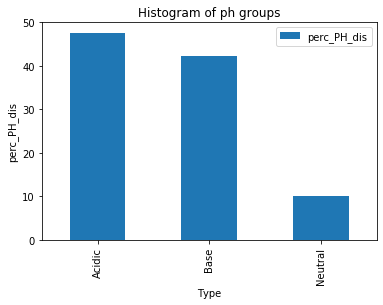

In [116]:
# df_null
ax = df_ph.plot.bar(x=df_ph.keys()[0], y=df_ph.keys()[1], rot=90,title='Histogram of ph groups')
# df_null.keys()[0] = columns
# df_null.keys()[1] = null_count
plt.xlabel('Type')
plt.ylabel("perc_PH_dis")

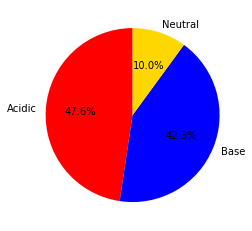

In [134]:
labels = df_ph['Type']
colors = ['red', 'blue', 'gold']
plt.pie(df_ph['perc_PH_dis'], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

**8.Use groupby to find for each crystallization temperature which proteins crystallize at that temperature.**

In [65]:
df_exe.groupby(['crystallizationTempK']).apply(lambda x: x.index.tolist())


crystallizationTempK
4.0                               [1EC7, 1EQG, 1FBS, 1QB0]
20.0      [1C12, 1C12, 1EH5, 1F4D, 1FBM, 1IYW, 1QD0, 1WE0]
25.0                                                [1JEH]
129.0                                               [1FCN]
140.0                                               [1EYE]
                               ...                        
323.0    [1DFA, 1F9Z, 1G4U, 1G4U, 1I2M, 1I2M, 1M54, 1MF...
333.0                                         [2I1W, 2I2F]
334.0                                               [1JJE]
335.0                                               [1P2F]
398.0                                               [1N9E]
Length: 134, dtype: object

In [66]:
first_column = df_exe.iloc[:,0]
first_column

structureId
1A4S    OXIDOREDUCTASE
1A6Q         HYDROLASE
1A72    OXIDOREDUCTASE
1A8O     VIRAL PROTEIN
1ACC             TOXIN
             ...      
6F5U     VIRAL PROTEIN
6F6P         HYDROLASE
6F6P         HYDROLASE
6F6S     VIRAL PROTEIN
6F8P     VIRAL PROTEIN
Name: classification, Length: 36146, dtype: object

**9.Create a new dataframe which contain only the maximum value of 'structureMolecularWeight' for each classification:**

In [71]:
type_classificarion = df_exe['classification'].unique()
type_classificarion

array(['OXIDOREDUCTASE', 'HYDROLASE', 'VIRAL PROTEIN', 'TOXIN',
       'HYDROLASE/HYDROLASE INHIBITOR', 'ELECTRON TRANSPORT',
       'TRANSFERASE', 'LIGASE', 'SIGNALING PROTEIN', 'IMMUNE SYSTEM',
       'LYASE', 'DNA BINDING PROTEIN', 'GENE REGULATION',
       'MEMBRANE PROTEIN', 'CHAPERONE', 'SUGAR BINDING PROTEIN',
       'TRANSCRIPTION', 'TRANSFERASE/TRANSFERASE INHIBITOR', 'ISOMERASE',
       'CELL ADHESION', 'STRUCTURAL PROTEIN', 'RNA BINDING PROTEIN',
       'TRANSPORT PROTEIN', 'PHOTOSYNTHESIS', 'METAL BINDING PROTEIN',
       'UNKNOWN FUNCTION', 'CELL CYCLE', 'PROTEIN BINDING',
       'PROTEIN TRANSPORT', 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR'],
      dtype=object)

In [74]:
df_exe.loc[df_exe.groupby('classification')['structureMolecularWeight'].idxmax()]

,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,sequence,pH
structureId,,,,,,,,,,,,
3K6S,CELL ADHESION,X-RAY DIFFRACTION,7128.0,3.50,796314.75,277.0,3.69,66.64,6.50,2010.0,FNLDTEELTAFRVDSAGFGDSVVQYANSWVVVGAPQKITAANQTGG...,Acidic
3K6S,CELL ADHESION,X-RAY DIFFRACTION,7128.0,3.50,796314.75,277.0,3.69,66.64,6.50,2010.0,QECTKFKVSSCRECIESGPGCTWCQKLNFTGPGDPDSIRCDTRPQL...,Acidic
3DBL,CELL CYCLE,X-RAY DIFFRACTION,4212.0,2.90,473996.34,291.0,3.00,59.02,7.50,2008.0,MKLDWEGRWNHVKKFLERSGPFTHPDFEPSTESLQFLLDTCKVLVI...,Base
3DBL,CELL CYCLE,X-RAY DIFFRACTION,4212.0,2.90,473996.34,291.0,3.00,59.02,7.50,2008.0,GSRRASVGSGGSMLIKVKTLTGKEIEIDIEPTDKVERIKERVEEKE...,Base
6EKC,CHAPERONE,X-RAY DIFFRACTION,44480.0,2.63,4921404.50,291.0,2.56,52.02,7.00,2017.0,MAYTQSKSQKVGYQAGVKDYRLTYYTPDYTPKDTDILAAFRVTPQP...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
4NPQ,TRANSPORT PROTEIN,X-RAY DIFFRACTION,6360.0,4.35,726976.12,293.0,5.10,75.89,7.50,2014.0,AQDMVSPPPPIADEPLTVNTGIYLIECYSLDDKAETFKVNAFLSLS...,Base
4RKM,UNKNOWN FUNCTION,X-RAY DIFFRACTION,8784.0,2.20,1048876.38,298.0,2.55,51.68,7.25,2015.0,MLSGWSVLKGGNMKYWDKALLSLFMCVSTLSIAATHAVAMEGMQMT...,Base
4V96,VIRAL PROTEIN,X-RAY DIFFRACTION,16242.0,3.80,1776025.25,293.0,4.19,70.61,8.00,2012.0,MTEHFITLSTTEPNNNIGIVKLRHADVNSQAIVAQIVENGQPKNFE...,Base
